<a href="https://colab.research.google.com/github/pratyush00101/dynamic-programming-assignment/blob/main/CatsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:10<00:00, 78.9MB/s]
100% 1.06G/1.06G [00:11<00:00, 103MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [5]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs_vs_cats/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256),



)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs_vs_cats/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256),



)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def processing_data(image , label):
  image = tf.cast(image/255. , tf.float32)
  return image , label

train_dataset = train_dataset.map(processing_data)
validation_dataset = validation_dataset.map(processing_data)

In [22]:
#cnn models
model = Sequential()
for filters in [32, 64, 128]:
    model.add(Conv2D(filters, kernel_size=(3,3), padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))





model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))







In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics=['accuracy'])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 82ms/step - accuracy: 0.5841 - loss: 2.2475 - val_accuracy: 0.6410 - val_loss: 0.7155
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.7059 - loss: 0.5944 - val_accuracy: 0.5696 - val_loss: 0.7647
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 85ms/step - accuracy: 0.7738 - loss: 0.4700 - val_accuracy: 0.7396 - val_loss: 0.4992
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8118 - loss: 0.4097 - val_accuracy: 0.7802 - val_loss: 0.5197
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8407 - loss: 0.3544 - val_accuracy: 0.7956 - val_loss: 0.4886
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.8834 - loss: 0.2785 - val_accuracy: 0.7176 - val_loss: 0.8655
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.9212 - loss: 0.1921 - val_accuracy: 0.6832 - val_loss: 1.1071
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9480 - loss: 0.1289 - 

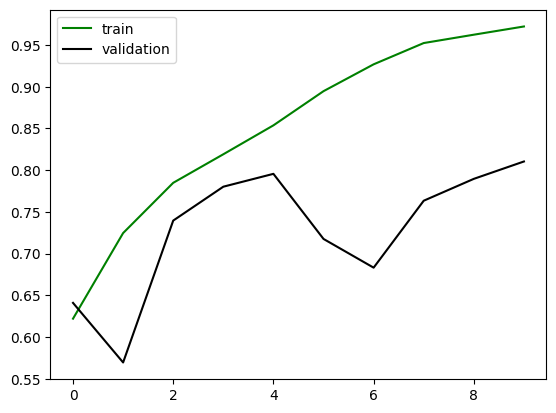

In [25]:
# Train the model and store the training history
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

# Now you can use the history object for plotting
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='black', label='validation')
plt.legend()
plt.show()

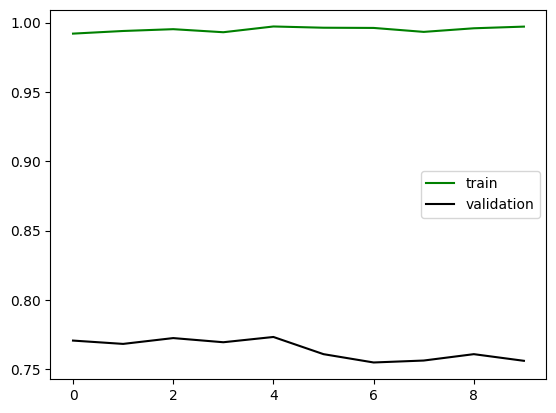

In [21]:
# Now you can use the history object for plotting

plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='black', label='validation')
plt.legend()
plt.show()

different ways to improove the validation --
#add more data ,
data augumentation,
L1 / L2 regulariser
dropout -------DONE--------
batch normalisaiton -------DONE-------
reducing the overall code complexity ----- DONE -------


In [26]:
import cv2

In [28]:
test_image = cv2.imread('/content/DOGS.jpg')

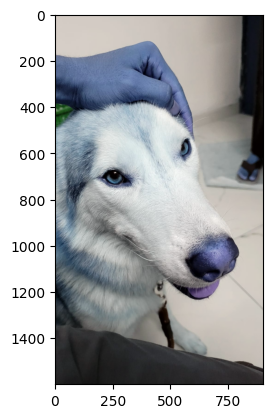

In [29]:
plt.imshow(test_image)

In [30]:
test_image.shape

(1600, 900, 3)

In [31]:
test_image = cv2.resize(test_image , (256,256))

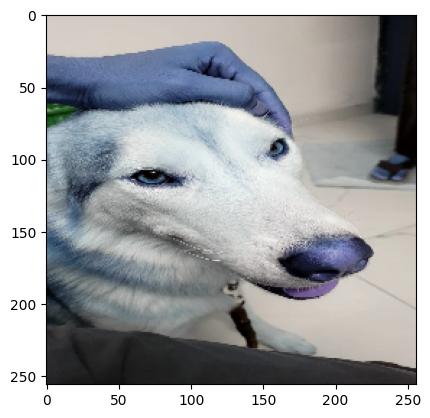

In [32]:
plt.imshow(test_image)

In [34]:
test_input = test_image.reshape(1 , 256, 256 ,3)

In [35]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step


array([[1.]], dtype=float32)